In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
%matplotlib inline


In [2]:
df=pd.read_csv('Library_Usage.csv.zip')

In [3]:
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True,NaN
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False,NaN
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True,NaN
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,z,email,True,2003,False,NaN
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016,z,email,True,2003,False,NaN


In [4]:
df.tail()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
423443,0,ADULT,170,12,45 to 54 years,X,Main Library,August,2014,z,email,True,2008,False,6.0
423444,1,JUVENILE,4,0,10 to 19 years,X,Main Library,March,2015,z,email,True,2014,False,8.0
423445,0,ADULT,4,1,25 to 34 years,X,Main Library,January,2014,z,email,True,2011,False,NaN
423446,0,ADULT,30,4,20 to 24 years,O7,Ortega,July,2016,z,email,True,2005,False,4.0
423447,2,YOUNG ADULT,662,93,10 to 19 years,A5,Anza,April,2016,z,email,True,2003,False,NaN


In [5]:
df.dtypes

Patron Type Code                  int64
Patron Type Definition           object
Total Checkouts                   int64
Total Renewals                    int64
Age Range                        object
Home Library Code                object
Home Library Definition          object
Circulation Active Month         object
Circulation Active Year          object
Notice Preference Code           object
Notice Preference Definition     object
Provided Email Address             bool
Year Patron Registered            int64
Outside of County                  bool
Supervisor District             float64
dtype: object

In [6]:
df.describe() # Describe is used to view some basic statistical details like, percentile, mean, standard deviation, etc of the given dataframe.

,Patron Type Code,Total Checkouts,Total Renewals,Year Patron Registered,Supervisor District
count,423448.000000,423448.000000,423448.000000,423448.000000,313138.000000
mean,1.036765,161.982097,59.657327,2010.348917,6.288240
std,4.188198,453.703678,225.009917,4.357374,3.123634
min,0.000000,0.000000,0.000000,2003.000000,1.000000
25%,0.000000,2.000000,0.000000,2007.000000,4.000000
50%,0.000000,19.000000,2.000000,2012.000000,6.000000
75%,1.000000,113.000000,27.000000,2014.000000,9.000000
max,104.000000,35907.000000,8965.000000,2016.000000,11.000000


In [7]:
df.info() #info tells about the datatypes and non null count in each column of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423448 entries, 0 to 423447
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patron Type Code              423448 non-null  int64  
 1   Patron Type Definition        423448 non-null  object 
 2   Total Checkouts               423448 non-null  int64  
 3   Total Renewals                423448 non-null  int64  
 4   Age Range                     423233 non-null  object 
 5   Home Library Code             423408 non-null  object 
 6   Home Library Definition       423448 non-null  object 
 7   Circulation Active Month      423448 non-null  object 
 8   Circulation Active Year       423448 non-null  object 
 9   Notice Preference Code        423448 non-null  object 
 10  Notice Preference Definition  423448 non-null  object 
 11  Provided Email Address        423448 non-null  bool   
 12  Year Patron Registered        423448 non-nul

In [8]:
#finding the missing values
df.isnull().sum()

Patron Type Code                     0
Patron Type Definition               0
Total Checkouts                      0
Total Renewals                       0
Age Range                          215
Home Library Code                   40
Home Library Definition              0
Circulation Active Month             0
Circulation Active Year              0
Notice Preference Code               0
Notice Preference Definition         0
Provided Email Address               0
Year Patron Registered               0
Outside of County                    0
Supervisor District             110310
dtype: int64

In [9]:
df.isnull()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423443,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
423444,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
423445,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
423446,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.dropna()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
141,3,SENIOR,469,282,65 to 74 years,C2,Chinatown,July,2016,z,email,True,2003,False,1.0
142,0,ADULT,256,102,45 to 54 years,P5,Portola,July,2016,z,email,True,2003,False,9.0
143,0,ADULT,552,105,55 to 59 years,R3,Richmond,July,2016,z,email,True,2003,False,1.0
144,0,ADULT,581,159,60 to 64 years,X,Main Library,August,2013,z,email,True,2003,False,10.0
145,0,ADULT,1245,1439,55 to 59 years,N6,North Beach,July,2016,z,email,True,2003,False,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423441,3,SENIOR,3,0,65 to 74 years,X,Main Library,July,2013,p,phone,False,2011,False,11.0
423442,0,ADULT,2,4,25 to 34 years,O7,Ortega,January,2015,z,email,True,2014,False,4.0
423443,0,ADULT,170,12,45 to 54 years,X,Main Library,August,2014,z,email,True,2008,False,6.0
423444,1,JUVENILE,4,0,10 to 19 years,X,Main Library,March,2015,z,email,True,2014,False,8.0


In [11]:
df1 = df.dropna()

In [12]:
df1

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
141,3,SENIOR,469,282,65 to 74 years,C2,Chinatown,July,2016,z,email,True,2003,False,1.0
142,0,ADULT,256,102,45 to 54 years,P5,Portola,July,2016,z,email,True,2003,False,9.0
143,0,ADULT,552,105,55 to 59 years,R3,Richmond,July,2016,z,email,True,2003,False,1.0
144,0,ADULT,581,159,60 to 64 years,X,Main Library,August,2013,z,email,True,2003,False,10.0
145,0,ADULT,1245,1439,55 to 59 years,N6,North Beach,July,2016,z,email,True,2003,False,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423441,3,SENIOR,3,0,65 to 74 years,X,Main Library,July,2013,p,phone,False,2011,False,11.0
423442,0,ADULT,2,4,25 to 34 years,O7,Ortega,January,2015,z,email,True,2014,False,4.0
423443,0,ADULT,170,12,45 to 54 years,X,Main Library,August,2014,z,email,True,2008,False,6.0
423444,1,JUVENILE,4,0,10 to 19 years,X,Main Library,March,2015,z,email,True,2014,False,8.0


In [13]:
# to check unique values
df['Patron Type Code'].unique()

array([  3,   0,  16,  55,   5,   9,   4,  15, 100,  10,  12,   1, 103,
         8, 104, 102,   2, 101])

Text(0.5, 1.0, 'Average Score for Age Range, by Total Checkouts')

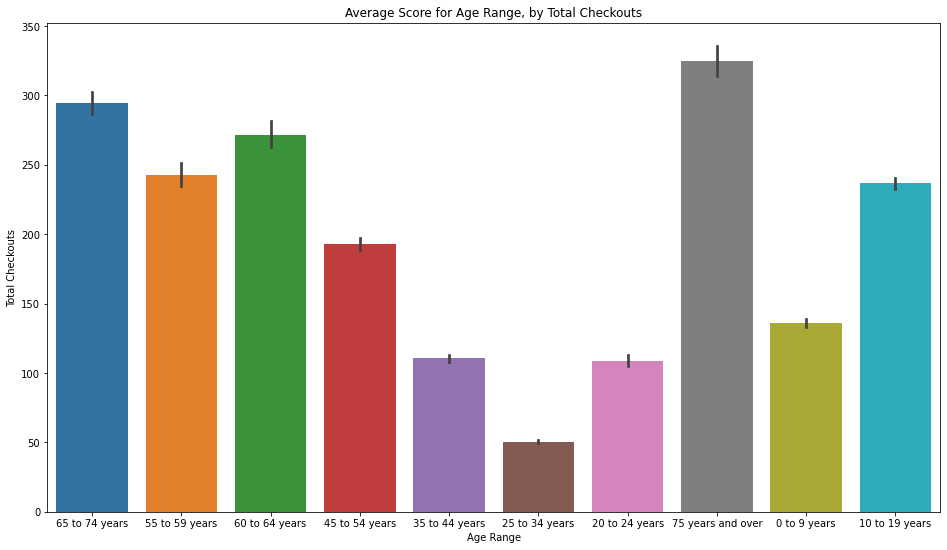

In [14]:
# Barplot showing average age range by Total Checkouts
plt.figure(figsize=(16, 9))

sns.barplot(y=df['Total Checkouts'], x=df['Age Range'])
plt.title("Average Score for Age Range, by Total Checkouts")

Text(0.5, 1.0, 'Average Score for Age Range, by Total Renewals')

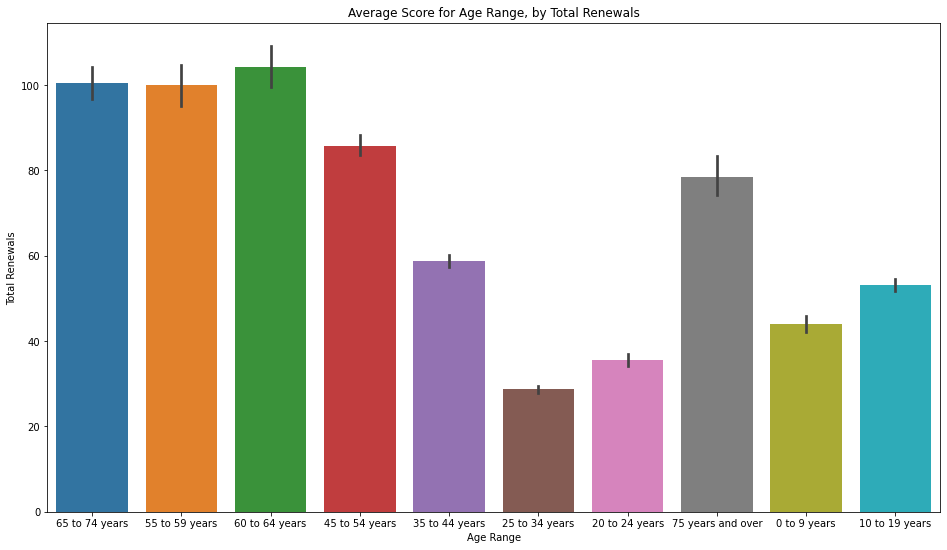

In [15]:
# Bar chart showing average score for age range by total renewals
plt.figure(figsize=(16, 9))
sns.barplot(y=df['Total Renewals'], x=df['Age Range'])
plt.title("Average Score for Age Range, by Total Renewals")

<AxesSubplot:title={'center':'Age Range Destribution'}, xlabel='count', ylabel='Age Range'>

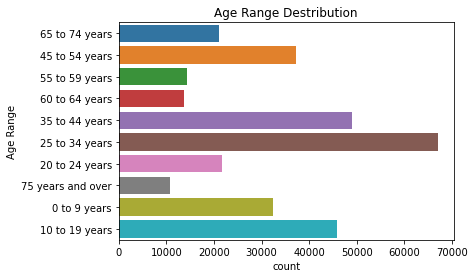

In [16]:
plt.title('Age Range Destribution')
sns.countplot(y='Age Range',data=df1)


<AxesSubplot:title={'center':'Home Library Registration'}, xlabel='count', ylabel='Home Library Definition'>

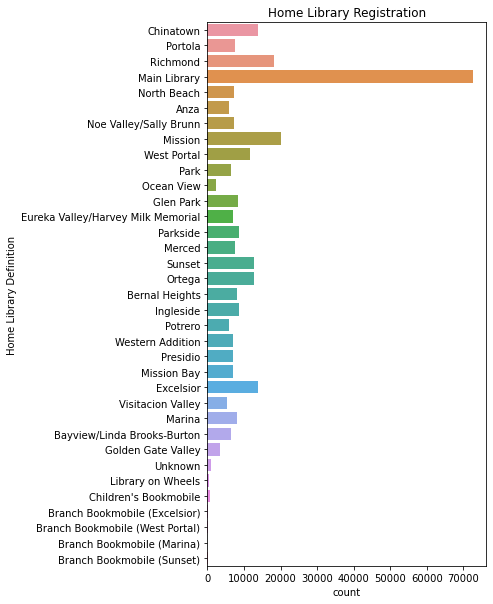

In [17]:
plt.figure(figsize=(5,10))
plt.title('Home Library Registration') 
sns.countplot(y='Home Library Definition', data=df1)

Text(0.5, 1.0, 'Average Score for Patron Type Definition, by Total Renewals')

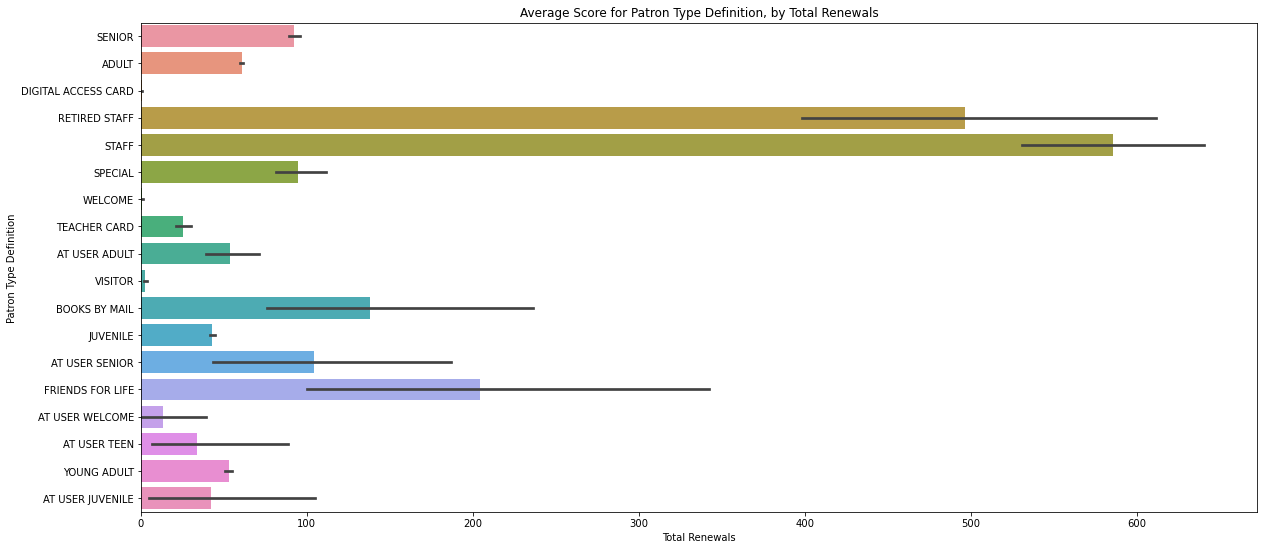

In [18]:
# Bar chart showing average score for Patron Type definition by Total renewals
plt.figure(figsize=(20, 9))
sns.barplot(x=df['Total Renewals'], y=df['Patron Type Definition'])
plt.title("Average Score for Patron Type Definition, by Total Renewals")

Text(0.5, 1.0, 'Average Score for Patron Type Definition, by Total Checkouts')

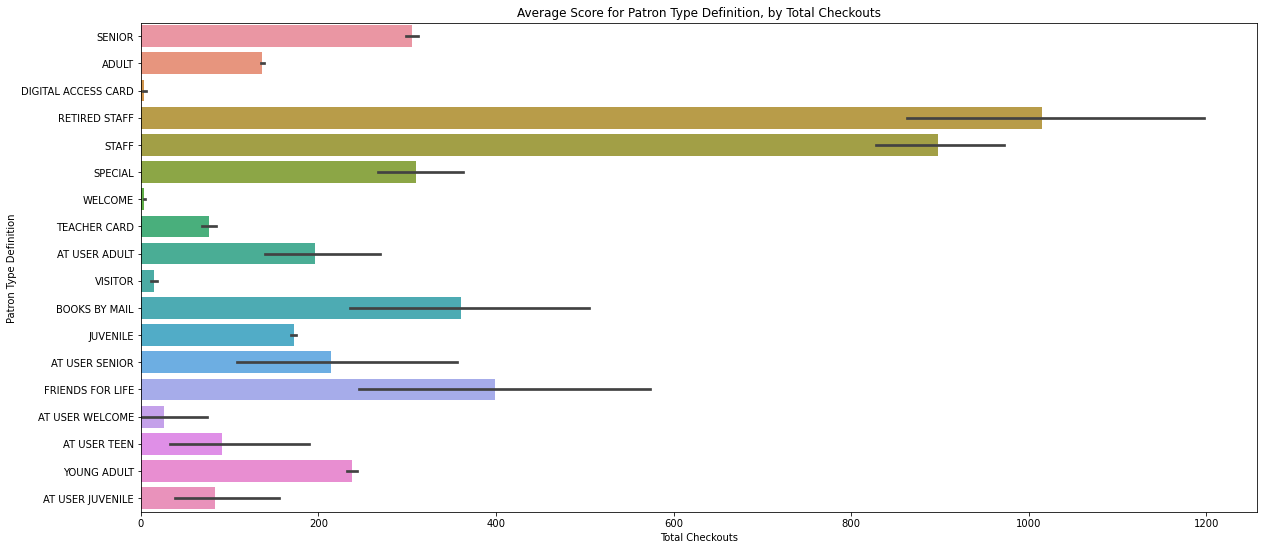

In [19]:
# Bar chart showing average score for Patron Type definition by Total checkouts
plt.figure(figsize=(20, 9))
sns.barplot(x=df['Total Checkouts'], y=df['Patron Type Definition'])
plt.title("Average Score for Patron Type Definition, by Total Checkouts")

<AxesSubplot:xlabel='Year Patron Registered'>

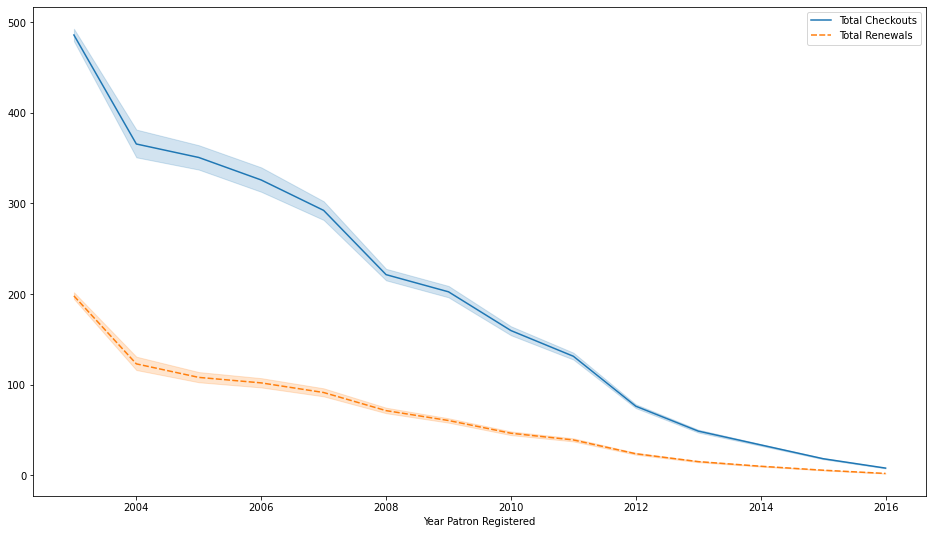

In [20]:
sf=df1[['Year Patron Registered','Total Checkouts','Total Renewals']]
ddf = sf.set_index(['Year Patron Registered'])
plt.figure(figsize=(16,9))
sns.lineplot(data=ddf)

<AxesSubplot:xlabel='Circulation Active Year'>

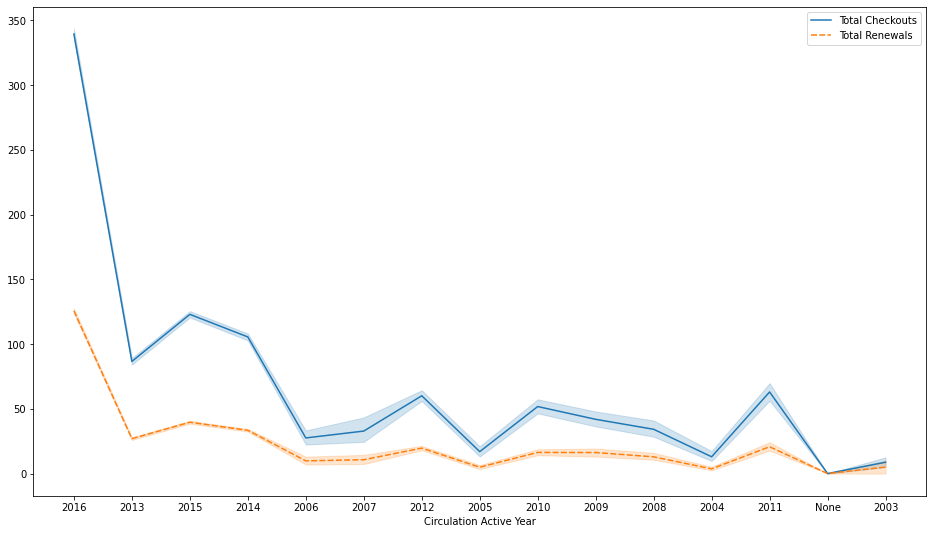

In [21]:
sf = df1[['Circulation Active Year','Total Checkouts','Total Renewals']]
ddf = sf.set_index(['Circulation Active Year'])
plt.figure(figsize=(16,9))
sns.lineplot(data=ddf)
#Lineplot for circulation active year

<AxesSubplot:xlabel='Total Checkouts', ylabel='Total Renewals'>

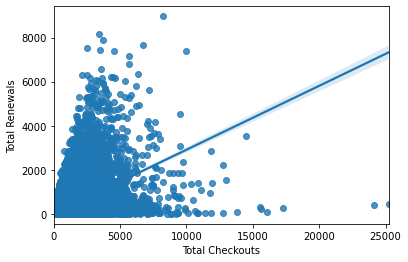

In [22]:
sns.regplot(x=df1['Total Checkouts'], y=df1['Total Renewals'])  # to check the relationship between total renewals and total checkouts

<AxesSubplot:xlabel='Circulation Active Month', ylabel='Total Checkouts'>

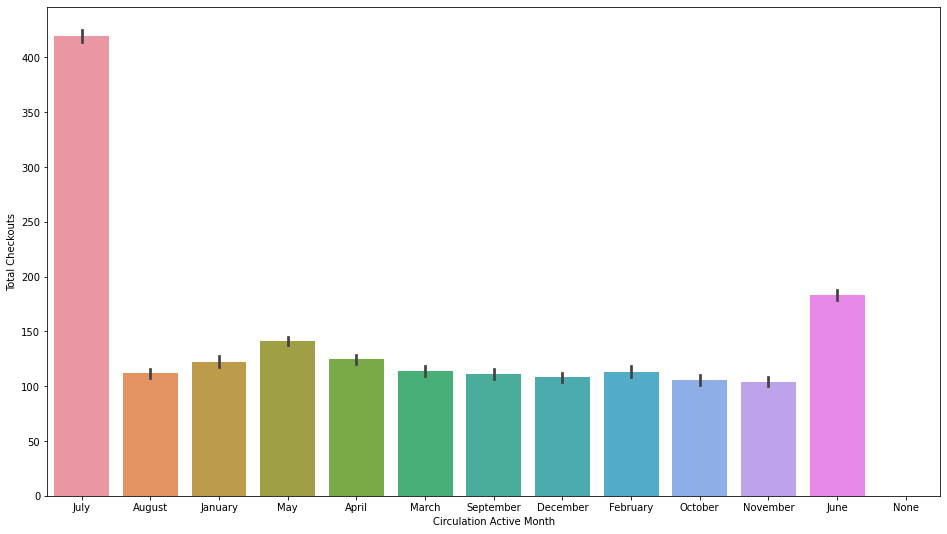

In [23]:
plt.figure(figsize=(16, 9))
sns.barplot(x=df1['Circulation Active Month'], y=df1['Total Checkouts']) # to check which month has more checkouts

<AxesSubplot:xlabel='Circulation Active Month', ylabel='Total Renewals'>

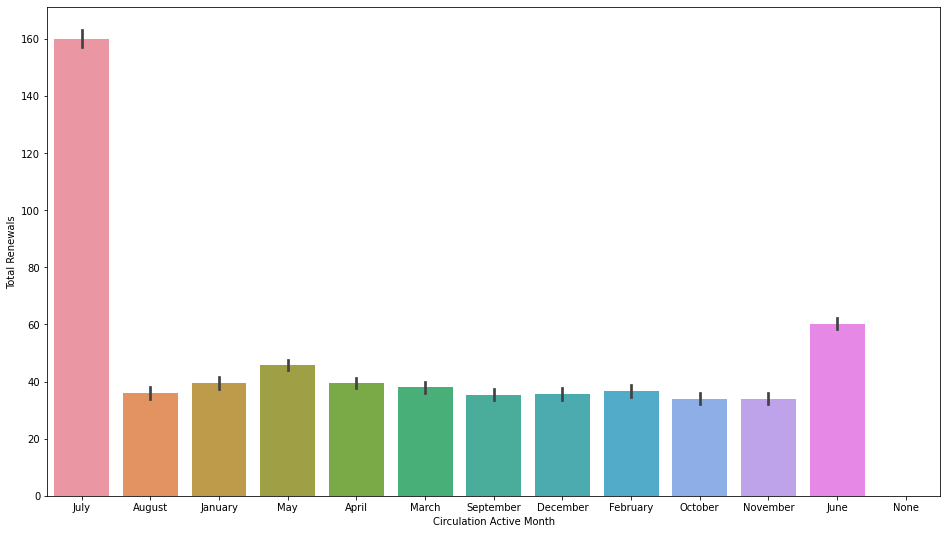

In [24]:
plt.figure(figsize=(16, 9))
sns.barplot(x=df1['Circulation Active Month'], y=df1['Total Renewals']) # to check which month has more renewals,
#July is the highest value in 'Total Renewals' and October is the lowest month.

In [25]:
df['Circulation Active Month'].unique()

array(['November', 'October', 'January', 'February', 'July', 'December',
       'September', 'May', 'August', 'March', 'June', 'April', 'None'],
      dtype=object)

Text(0.5, 1.0, 'Total Checkout vs Registration Year')

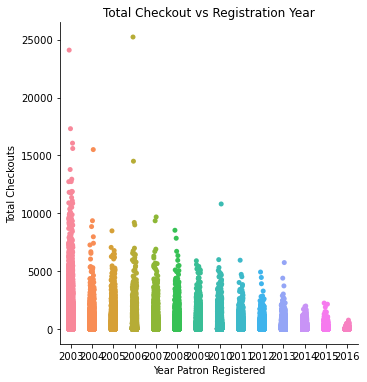

In [26]:
sns.catplot(x = "Year Patron Registered", y = "Total Checkouts", data = df1)
plt.title("Total Checkout vs Registration Year")
#To check the total checkout with the registrations in a particular year

Text(0.5, 1.0, 'Total Renewal vs Registration Year')

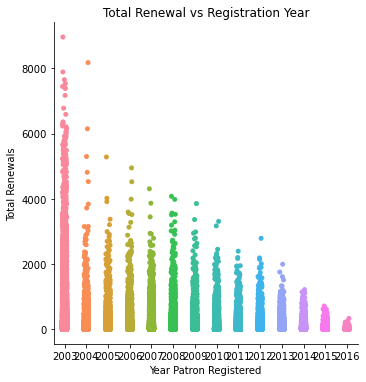

In [27]:
sns.catplot(x = "Year Patron Registered", y = "Total Renewals", data = df1)
plt.title("Total Renewal vs Registration Year")
#shows the Total Renewal vs Registration Year

<AxesSubplot:ylabel='Year Patron Registered'>

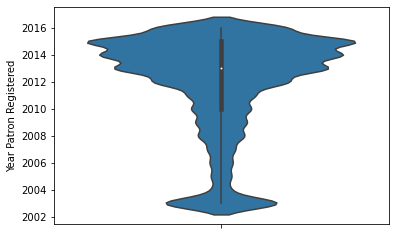

In [28]:
sns.violinplot(y="Year Patron Registered", data=df[df["Outside of County"] == True], split = True)
#Patrons Registration

<AxesSubplot:xlabel='Age Range', ylabel='Patron Type Definition'>

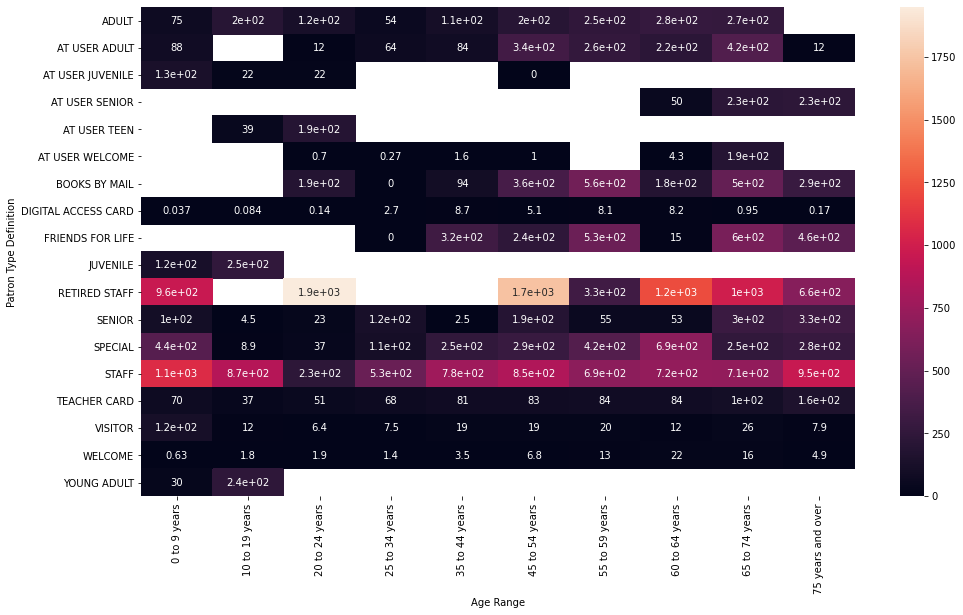

In [29]:
df2= df1[['Patron Type Definition','Total Checkouts','Age Range']]

heatmap_Data = pd.pivot_table(df, values='Total Checkouts', index=['Patron Type Definition'],columns=['Age Range'])
plt.figure(figsize=(16,9))
sns.heatmap(data=heatmap_Data, annot=True)
#Heat Map for relation between total checkouts, Patron Type and age range